# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [204]:
def random_tour(n):
    """Create a random tour"""

    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[1, 5, 7, 2, 9, 8, 3, 4, 6, 0]

In [205]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [206]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

tour = random_tour(10)
tour_length(tsp, tour)

np.float64(4.402194822371509)

Tour length: 4.4


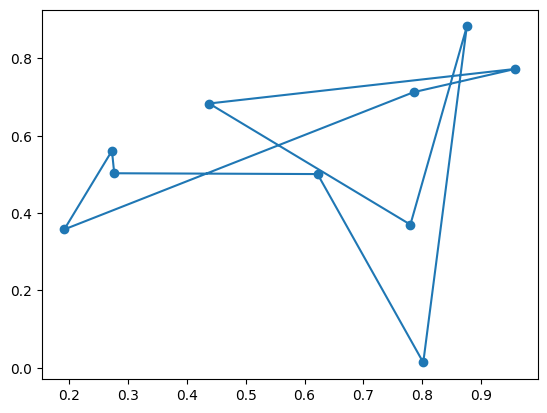

In [207]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]
    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): 
            tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        pos_ = pos.reindex(tour)
        # Mengganti append() dengan concat()
        pos_ = pd.concat([pos_, pos_.iloc[0:1]])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [208]:
%pip install rpy2

Note: you may need to restart the kernel to use updated packages.


In [209]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [210]:
%%R
if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

In [211]:
d = tsp["dist"]

Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [212]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class 'TSP' 
10 cities (distance 'unknown') 
object of class 'TOUR' 
result of method 'arbitrary_insertion+two_opt_rep_100' for 10 cities
tour length: 2.763574 


Tour length: 2.76


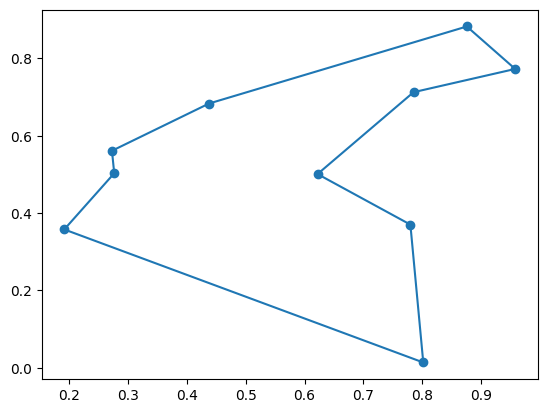

In [213]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [214]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr min     lq    mean median    uq   max neval
 tsp <- TSP(d) 181 186.85 217.331 196.45 207.6 741.1   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

- Menghitung fungsi objektif untuk semua local moves
- Selalu memilih move terbaik dari semua kemungkinan

In [215]:
def swap_cities(tour, i, j):  # Fungsi untuk menukar dua kota dalam sebuah rute (tour)
    """Helper function to swap two cities in a tour"""  
    new_tour = tour.copy()  # Salin rute agar tidak mengubah rute asli (menghindari efek samping)
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]  # Tukar posisi kota ke-i dan ke-j
    return new_tour  # Kembalikan rute baru setelah pertukaran

Tour length: 2.8810894251962416
Tour length: 2.88


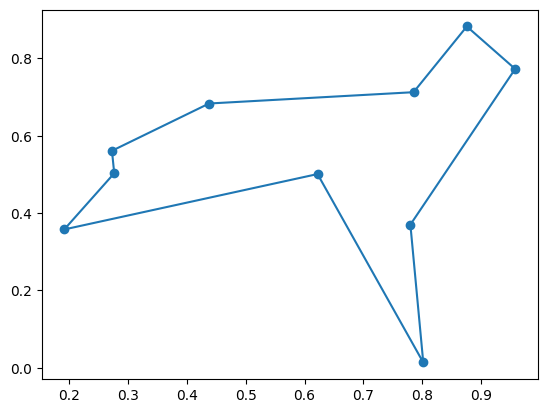

In [ ]:
def steepest_hill_climbing(tsp, initial_tour, max_iter=1000):
    """Steepest hill climbing untuk menyelesaikan TSP"""

    current_tour = initial_tour.copy() # Salin rute awal sebagai solusi saat ini
    current_length = tour_length(tsp, current_tour) # Menghitung panjang rute saat ini
    n = len(current_tour) # Mendapatkan jumlah kota dalam rute
    
    # Melakukan iterasi sebanyak max_iter
    for _ in range(max_iter): 
        best_neighbor = current_tour # Inisialisasi tetangga terbaik dengan rute saat ini
        best_length = current_length # Inisialisasi panjang terbaik dengan panjang saat ini
        
        # Memeriksa semua kemungkinan pertukaran kota
        for i in range(n):
            for j in range(i+1, n):
                # Mencoba menukar posisi dua kota
                neighbor = swap_cities(current_tour, i, j)
                # Menghitung panjang rute setelah pertukaran
                neighbor_length = tour_length(tsp, neighbor)
                
                # Jika ditemukan rute yang lebih pendek
                if neighbor_length < best_length:
                    best_neighbor = neighbor # Memperbarui tetangga terbaik
                    best_length = neighbor_length # Memperbarui panjang terbaik
        
        # Jika tidak ada perbaikan, hentikan pencarian
        if best_length >= current_length:
            break
            
        current_tour = best_neighbor # Memperbarui rute saat ini dengan tetangga terbaik
        current_length = best_length # Memperbarui panjang rute saat ini

    # Mengembalikan rute saat ini dengan panjangnya    
    return current_tour, current_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = steepest_hill_climbing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.
- Variasi dari algoritma Steepest Ascent Hill Climbing yang menambahkan komponen restart acak untuk mengatasi masalah local optima.

Tour length: 2.763573577757701
Tour length: 2.76


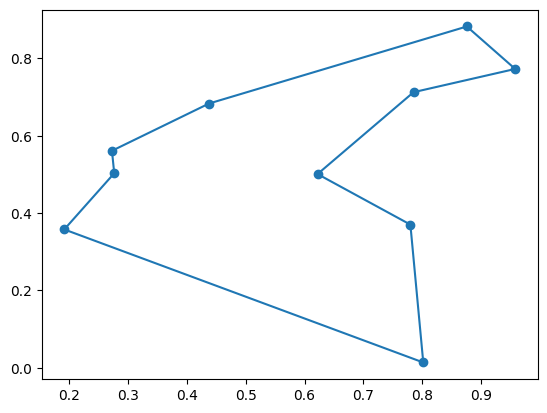

In [ ]:
def steepest_hill_climbing_random_restart(tsp, num_restarts=10):
    """Steepest-ascend hill climbing dengan restart acak"""
    best_tour = None # Menyimpan rute terbaik
    best_length = float('inf') # Menyimpan panjang rute terbaik
    
    # Melakukan restart sebanyak num_restarts kali
    for _ in range(num_restarts):
        initial_tour = random_tour(len(tsp['pos'])) # Membuat rute awal acak baru
        tour, length = steepest_hill_climbing(tsp, initial_tour) # Menjalankan steepest hill climbing

        # Memperbarui jika menemukan solusi yang lebih baik
        if length < best_length:
            best_tour = tour
            best_length = length
            
    # Mengembalikan rute saat ini dengan panjangnya          
    return best_tour, best_length

# Test the algorithm
best_tour, best_length = steepest_hill_climbing_random_restart(tsp)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

Tour length: 2.763573577757701
Tour length: 2.76


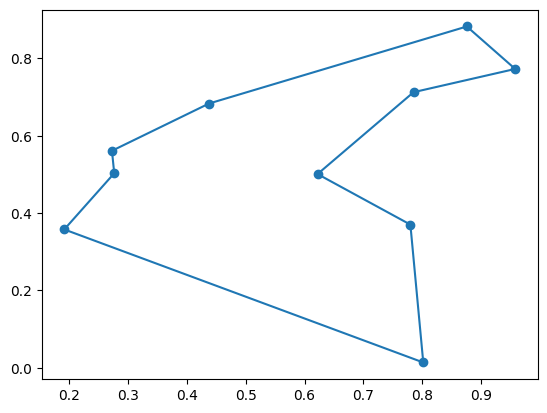

In [218]:
def stochastic_hill_climbing(tsp, initial_tour, max_iter=1000):
    """Stochastic hill climbing untuk menyelesaikan TSP"""
    current_tour = initial_tour.copy()  # Salin rute awal sebagai solusi saat ini
    current_length = tour_length(tsp, current_tour) # Hitung panjang rute saat ini
    n = len(current_tour) # Jumlah kota dalam rute
    
    # Melakukan iterasi sebanyak max_iter
    for _ in range(max_iter):

        # Generate random swap
        i, j = random.sample(range(n), 2)  # Pilih dua indeks kota secara acak
        neighbor = swap_cities(current_tour, i, j) # Tukar posisi dua kota untuk membuat tetangga
        neighbor_length = tour_length(tsp, neighbor) # Hitung panjang rute tetangga

        # Jika tetangga lebih baik (lebih pendek)
        if neighbor_length < current_length: 
            current_tour = neighbor # Update solusi saat ini dengan tetangga
            current_length = neighbor_length # Update panjang rute saat ini

    # Kembalikan solusi terbaik yang ditemukan       
    return current_tour, current_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = stochastic_hill_climbing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Tour length: 3.343031014902228
Tour length: 3.34


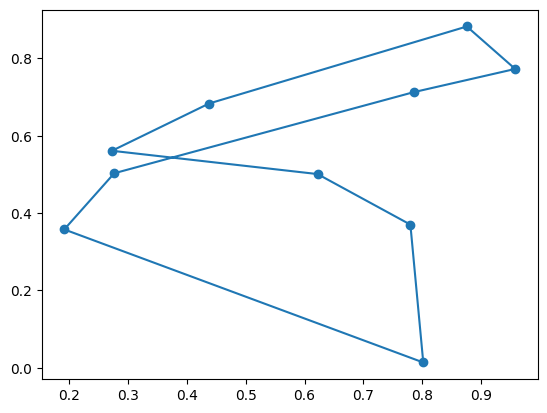

In [219]:
def first_choice_hill_climbing(tsp, initial_tour, max_attempts=100, max_iter=1000):
    """Algoritma First-Choice Hill Climbing untuk menyelesaikan TSP"""
    current_tour = initial_tour.copy() # Salin rute awal sebagai solusi saat ini
    current_length = tour_length(tsp, current_tour)# Hitung panjang rute saat ini
    n = len(current_tour) # Jumlah kota dalam rute
    
    # Lakukan iterasi maksimal sebanyak max_iter
    for _ in range(max_iter): 
        found_better = False # Penanda apakah solusi yang lebih baik ditemukan

        attempts = 0 # Hitung jumlah percobaan mencari tetangga
        
        # Coba mencari tetangga acak hingga menemukan solusi yang lebih baik atau mencapai batas percobaan
        while attempts < max_attempts and not found_better:
            i, j = random.sample(range(n), 2) # Pilih dua kota secara acak untuk ditukar
            neighbor = swap_cities(current_tour, i, j) # Buat rute tetangga dengan menukar dua kota
            neighbor_length = tour_length(tsp, neighbor) # Hitung panjang rute tetangga
            
            # Jika tetangga lebih baik (lebih pendek)
            if neighbor_length < current_length:
                current_tour = neighbor # Perbarui rute saat ini dengan tetangga
                current_length = neighbor_length # Perbarui panjang rute
                found_better = True # Tandai bahwa solusi lebih baik telah ditemukan
            
            attempts += 1 # Tambah jumlah percobaan
            
        # Jika tidak ada solusi yang lebih baik ditemukan, hentikan pencarian
        if not found_better:
            break
        
    # Kembalikan rute terbaik dan panjangnya       
    return current_tour, current_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = first_choice_hill_climbing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Simulated Annealing [2 Points]

Tour length: 2.763573577757701
Tour length: 2.76


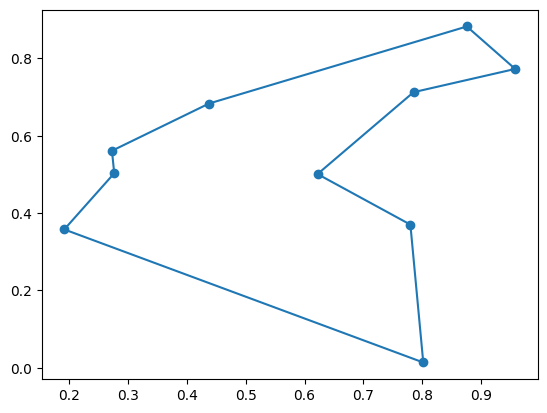

In [220]:
def simulated_annealing(tsp, initial_tour, temp=1000.0, cooling_rate=0.995, min_temp=1e-8):
    """Algoritma Simulated Annealing untuk menyelesaikan TSP"""
    current_tour = initial_tour.copy() # Salin rute awal sebagai solusi saat ini
    current_length = tour_length(tsp, current_tour) # Hitung panjang rute saat ini
    best_tour = current_tour.copy() # Simpan rute terbaik yang ditemukan sejauh ini
    best_length = current_length # Simpan panjang rute terbaik
    temperature = temp # Inisialisasi suhu awal
    n = len(current_tour) # Jumlah kota dalam tur
    
    # Iterasi selama suhu belum turun di bawah batas minimum
    while temperature > min_temp:
        i, j = random.sample(range(n), 2) # Pilih dua kota secara acak untuk ditukar
        neighbor = swap_cities(current_tour, i, j) # Buat rute tetangga dengan menukar dua kota
        neighbor_length = tour_length(tsp, neighbor)  # Hitung panjang rute tetangga

        
        # Hitung selisih panjang rute antara tetangga dan solusi saat ini
        delta = neighbor_length - current_length

        # Terima tetangga jika lebih baik, atau dengan probabilitas tertentu jika lebih buruk
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            current_tour = neighbor # Perbarui rute saat ini
            current_length = neighbor_length # Perbarui panjang rute
            
            # Jika rute saat ini lebih baik dari yang terbaik, simpan sebagai solusi terbaik
            if current_length < best_length:
                best_tour = current_tour.copy()
                best_length = current_length

        # Turunkan suhu secara bertahap (cooling)        
        temperature *= cooling_rate
        
    # Kembalikan rute terbaik dan panjangnya    
    return best_tour, best_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = simulated_annealing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [221]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.8380413055419922 milliseconds


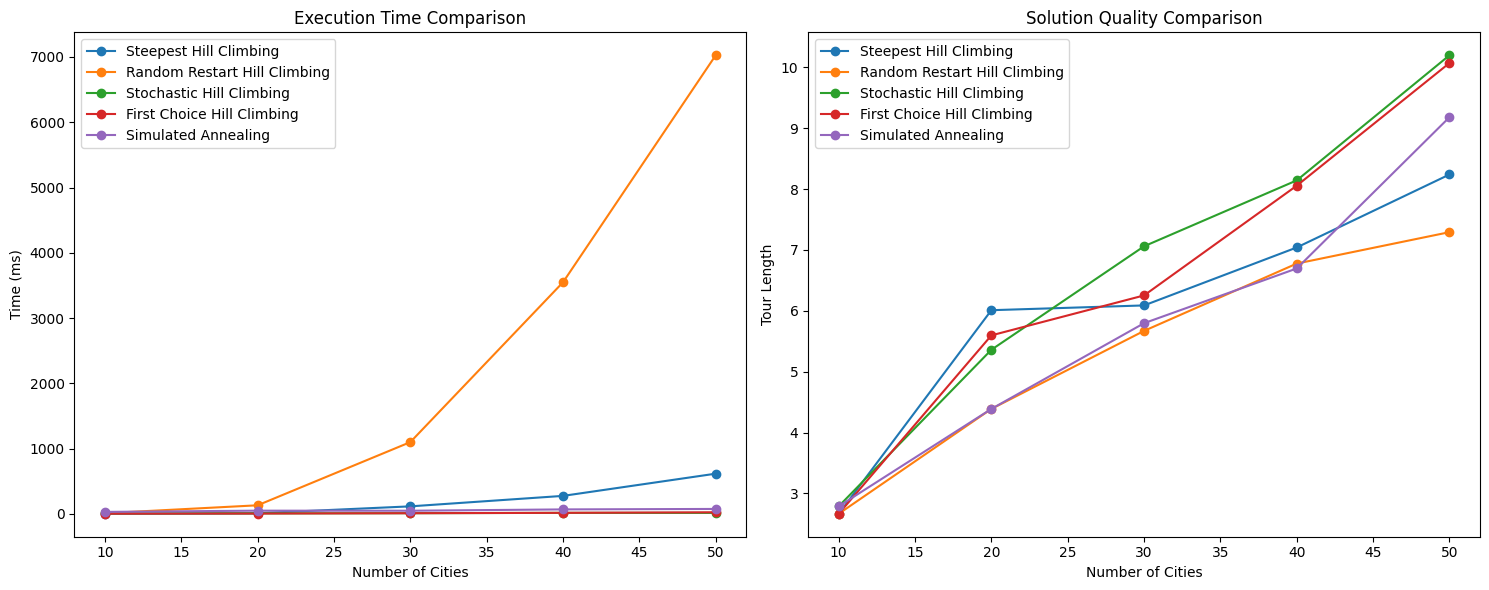


Detailed Results:
                       Algorithm  Size  Tour Length  Time (ms)
0         Steepest Hill Climbing    10         2.67       1.12
1   Random Restart Hill Climbing    10         2.67       9.81
2       Stochastic Hill Climbing    10         2.79       6.33
3     First Choice Hill Climbing    10         2.67       2.81
4            Simulated Annealing    10         2.79      30.11
5         Steepest Hill Climbing    20         6.01       9.92
6   Random Restart Hill Climbing    20         4.39     131.37
7       Stochastic Hill Climbing    20         5.36       7.84
8     First Choice Hill Climbing    20         5.60       4.91
9            Simulated Annealing    20         4.39      49.00
10        Steepest Hill Climbing    30         6.09     115.08
11  Random Restart Hill Climbing    30         5.67    1099.21
12      Stochastic Hill Climbing    30         7.06      10.31
13    First Choice Hill Climbing    30         6.25       9.86
14           Simulated Annealing    

In [222]:
def compare_algorithms(tsp_sizes=[10, 20, 30, 40, 50]):  # Fungsi untuk membandingkan performa 5 algoritma TSP pada berbagai ukuran kota
    """Compare performance of 5 different algorithms"""  

    results = []  # Inisialisasi list kosong untuk menyimpan hasil tiap algoritma

    for size in tsp_sizes:  # Iterasi untuk setiap ukuran jumlah kota dalam TSP
        test_tsp = random_tsp(size)  # Buat instance TSP acak dengan jumlah kota tertentu
        initial_tour = random_tour(size)  # Buat rute awal secara acak

        # Daftar algoritma yang akan diuji
        algorithms = [
            ("Steepest Hill Climbing", steepest_hill_climbing),  # Hill climbing klasik
            ("Random Restart Hill Climbing", steepest_hill_climbing_random_restart),  # Hill climbing dengan restart acak
            ("Stochastic Hill Climbing", stochastic_hill_climbing),  # Hill climbing dengan tetangga acak
            ("First Choice Hill Climbing", first_choice_hill_climbing),  # Hill climbing dengan pilihan pertama yang membaik
            ("Simulated Annealing", simulated_annealing)  # Algoritma dengan probabilitas penerimaan solusi buruk
        ]

        # Jalankan setiap algoritma dan simpan hasilnya
        for name, algo in algorithms:  # Iterasi untuk setiap algoritma
            start_time = time.time()  # Catat waktu mulai eksekusi

            # Jalankan algoritma, khusus Random Restart tidak butuh rute awal
            tour, length = algo(test_tsp, initial_tour) if name != "Random Restart Hill Climbing" else algo(test_tsp)

            end_time = time.time()  # Catat waktu selesai eksekusi

            # Simpan hasil ke dalam list sebagai dictionary
            results.append({
                'Algorithm': name,  # Nama algoritma
                'Size': size,  # Jumlah kota
                'Tour Length': length,  # Panjang rute hasil
                'Time (ms)': (end_time - start_time) * 1000  # Waktu eksekusi dalam milidetik
            })

    df = pd.DataFrame(results)  # Ubah hasil menjadi DataFrame untuk analisis dan visualisasi

    plt.figure(figsize=(15, 6))  # Buat figure dengan ukuran lebar 15 dan tinggi 6

    plt.subplot(1, 2, 1)  # Subplot pertama: perbandingan waktu eksekusi
    for name in df['Algorithm'].unique():  # Iterasi untuk setiap algoritma unik
        data = df[df['Algorithm'] == name]  # Ambil data untuk algoritma tertentu
        plt.plot(data['Size'], data['Time (ms)'], marker='o', label=name)  # Plot ukuran vs waktu eksekusi
    plt.xlabel('Number of Cities')  # Label sumbu X
    plt.ylabel('Time (ms)')  # Label sumbu Y
    plt.title('Execution Time Comparison')  # Judul grafik
    plt.legend()  # Tampilkan legenda algoritma

    plt.subplot(1, 2, 2)  # Subplot kedua: perbandingan kualitas solusi
    for name in df['Algorithm'].unique():  # Iterasi untuk setiap algoritma unik
        data = df[df['Algorithm'] == name]  # Ambil data untuk algoritma tertentu
        plt.plot(data['Size'], data['Tour Length'], marker='o', label=name)  # Plot ukuran vs panjang rute
    plt.xlabel('Number of Cities')  # Label sumbu X
    plt.ylabel('Tour Length')  # Label sumbu Y
    plt.title('Solution Quality Comparison')  # Judul grafik
    plt.legend()  # Tampilkan legenda algoritma

    plt.tight_layout()  # Atur tata letak agar grafik tidak saling tumpang tindih
    plt.show()  # Tampilkan grafik

    print("\nDetailed Results:")  # Cetak hasil detail
    print(df)  # Tampilkan DataFrame hasil

    print("\nSummary Statistics:")  # Cetak statistik ringkasan
    summary = df.groupby('Algorithm').agg({  # Kelompokkan data berdasarkan algoritma
        'Time (ms)': ['mean', 'std'],  # Hitung rata-rata dan standar deviasi waktu
        'Tour Length': ['mean', 'std']  # Hitung rata-rata dan standar deviasi panjang rute
    }).round(2)  # Bulatkan hasil ke 2 angka desimal
    print(summary)  # Tampilkan statistik ringkasan


compare_algorithms()  # Eksekusi fungsi utama untuk membandingkan semua algoritma

## Bonus: Genetic Algorithm [+1 Point]

Generation 0: Best Length = 3.462821615666665
Generation 10: Best Length = 2.9062078251965873
Generation 20: Best Length = 2.7635735777577013
Generation 30: Best Length = 2.7635735777577013
Generation 40: Best Length = 2.7635735777577013
Generation 50: Best Length = 2.7635735777577013
Generation 60: Best Length = 2.7635735777577013
Generation 70: Best Length = 2.7635735777577013
Generation 80: Best Length = 2.7635735777577013
Generation 90: Best Length = 2.7635735777577013

Final Tour Length: 2.7635735777577013
Tour length: 2.76


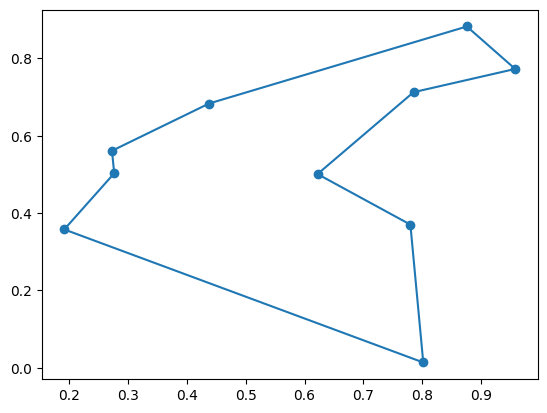

In [223]:
def genetic_algorithm_tsp(tsp, pop_size=50, num_generations=100, mutation_rate=0.1, elite_size=5): # Fungsi utama algoritma genetika untuk menyelesaikan TSP

    """
    Algoritma genetika untuk menyelesaikan TSP
    Args:
        tsp: Problem TSP
        pop_size: Ukuran populasi
        num_generations: Jumlah generasi
        mutation_rate: Tingkat mutasi
        elite_size: Jumlah individu elite yang dipertahankan
    """
    # Membuat populasi awal secara acak
    def create_initial_population(n, size):
        """Membuat populasi awal secara acak"""
        return [random_tour(n) for _ in range(size)] # Setiap individu adalah rute acak
    
    # Fungsi untuk menghitung nilai fitness
    def fitness(tour):
        """Menghitung nilai fitness (1/panjang_tour)"""
        return 1.0 / tour_length(tsp, tour)  # Semakin pendek rute, semakin tinggi nilai fitness
    
    # Operator crossover dengan metode Order Crossover (OX)
    def order_crossover(parent1, parent2):
        """Operator crossover dengan metode Order Crossover (OX)"""
        n = len(parent1) # Panjang tur
        start, end = sorted(random.sample(range(n), 2))  # Pilih dua titik acak sebagai batas subsequence
        
        # Mengambil subsequence dari parent1
        child = [-1] * n # Inisialisasi anak dengan nilai -1
        for i in range(start, end + 1): # Salin bagian dari parent1 ke anak
            child[i] = parent1[i]
        
        # Mengisi sisa posisi dengan urutan dari parent2
        remaining = [x for x in parent2 if x not in child[start:end + 1]] # Ambil kota dari parent2 yang belum ada
        j = 0
        for i in range(n): # Isi posisi kosong dengan urutan dari parent2
            if child[i] == -1:
                child[i] = remaining[j]
                j += 1
                
        return child # Kembalikan anak hasil crossover
    
    # Operator mutasi dengan metode swap
    def mutate(tour):
        """Operator mutasi dengan swap mutation"""
        if random.random() < mutation_rate: # Mutasi terjadi berdasarkan probabilitas
            i, j = random.sample(range(len(tour)), 2)# Pilih dua kota acak 
            tour[i], tour[j] = tour[j], tour[i]# Tukar posisi dua kota 
        return tour # Kembalikan tur setelah mutasi
    
    # Inisialisasi populasi
    n = len(tsp['pos'])  # Jumlah kota dalam TSP
    population = create_initial_population(n, pop_size) # Buat populasi awal
    best_tour = None # Inisialisasi rute terbaik
    best_length = float('inf') # Inisialisasi panjang terbaik dengan nilai tak hingga
    
    # Evolusi selama num_generations
    for gen in range(num_generations):
        # Evaluasi fitness
        fitness_scores = [(tour, fitness(tour)) for tour in population] # Hitung fitness untuk setiap individu
        fitness_scores.sort(key=lambda x: x[1], reverse=True) # Urutkan berdasarkan fitness (semakin tinggi semakin baik)
         
        # Simpan individu terbaik
        current_best = fitness_scores[0][0] # Ambil individu terbaik saat ini
        current_length = tour_length(tsp, current_best) # Hitung panjang rute terbaik saat ini
        if current_length < best_length: # Jika lebih baik dari sebelumnya
            best_tour = current_best # Simpan sebagai rute terbaik
            best_length = current_length# Simpan panjang terbaik
 
        # Seleksi elit
        new_population = [tour for tour, _ in fitness_scores[:elite_size]] # Pertahankan individu elite
        
        # Seleksi dan reproduksi
        while len(new_population) < pop_size:
            # Tournament selection
            parent1 = random.choice([tour for tour, _ in fitness_scores[:pop_size//2]]) # Seleksi parent1 dari setengah populasi terbaik
            parent2 = random.choice([tour for tour, _ in fitness_scores[:pop_size//2]]) # Seleksi parent2 dari setengah populasi terbaik
            
            # Crossover
            child = order_crossover(parent1, parent2)
            
            # Mutasi
            child = mutate(child)
            
            new_population.append(child)
            
        population = new_population  # Tambahkan anak ke populasi baru
        
        # Cetak progres setiap 10 generasi
        if gen % 10 == 0: 
            print(f"Generation {gen}: Best Length = {best_length}")
    
    # Kembalikan rute terbaik dan panjangnya
    return best_tour, best_length 

# Test algoritma
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = genetic_algorithm_tsp(tsp)
print(f"\nFinal Tour Length: {best_length}")
show_tsp(tsp, best_tour)